# This Jupyter Notebook Specifically Will Show the Code for Problem 3 of Homework 1

In [1]:
import scipy.io
import pandas as pd
import mat4py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import random

# Loading in Data and Converting to Pandas DataFrame

In [2]:
mat_array = mat4py.loadmat('/Users/trebu/Downloads/vis_data.mat')

In [3]:
mat_dataframe = pd.DataFrame(mat_array)

In [4]:
mat_dataframe

,W
0,"[0.063072899261157, 0.09561849433129076, 0.126..."
1,"[0.5418410089232286, -0.05661396345396874, 0.0..."
2,"[0.9577197116363646, 1.2987560774209057, 1.342..."
3,"[-0.29945018584613553, 0.4505579792830716, 0.8..."
4,"[-0.046393278991246956, 0.019225775228446984, ..."
...,...
533,"[0.6657944213665705, 0.6711047226810104, 0.516..."
534,"[0.617734153974393, 0.4444045865757713, 0.4208..."
535,"[-0.2904368973431904, 0.5975676827371156, 0.97..."
536,"[-0.05203732989309018, 0.28845052434953444, 0...."


In [5]:
w1 = []
w2 = []
w3 = []
for i in range(0,len(mat_dataframe)):
    list_values = mat_dataframe["W"][i]
    w1.append(list_values[0])
    w2.append(list_values[1])
    w3.append(list_values[2])
new_mat_dataframe = pd.DataFrame()
new_mat_dataframe["w1"] = w1
new_mat_dataframe["w2"] = w2
new_mat_dataframe["w3"] = w3

In [6]:
new_mat_dataframe

,w1,w2,w3
0,0.063073,0.095618,0.126411
1,0.541841,-0.056614,0.067160
2,0.957720,1.298756,1.342079
3,-0.299450,0.450558,0.808990
4,-0.046393,0.019226,0.869677
...,...,...,...
533,0.665794,0.671105,0.516802
534,0.617734,0.444405,0.420828
535,-0.290437,0.597568,0.970739
536,-0.052037,0.288451,0.041013


# Problem 3: In This Problem, You Will Investigate the Box-Muller Algorithm.

## (i) Show Mathematically That the Box-Muller Algorithm Indeed Produces Values With the Correct Statistics.

Section (i) of problem 3 will be shown within the google doc, it does not require any code.

## (ii) Develop a Function That Takes Input μ,σ and Implements the Box-Muller Algorithm

In [7]:
def box_muller(mu = None, sigma = None):
    u,v = (np.random.uniform(0,1,1000), np.random.uniform(0,1,1000))
    
    x_append = []
    y_append = []
    for i in range(0,len(u)):
        x = mu + sigma * math.sqrt(-2*math.log(u[i]))*(math.cos(2*math.pi*v[i]))
        y = mu + sigma * math.sqrt(-2*math.log(u[i]))*(math.sin(2*math.pi*v[i]))
       
        y_append.append(y)
        x_append.append(x)
    return x_append,y_append

In [8]:
x_mueller,y_mueller = box_muller(mu=20,sigma=40)

In [9]:
random_normal = np.random.normal(0,1,1000)

In [10]:
box_dataframe = pd.DataFrame()
pd.concat([pd.Series(x_mueller),pd.Series(random_normal)],ignore_index=True)
box_dataframe["Box_Mueller_X"] = x_mueller
box_dataframe["Box_Mueller_Y"] = y_mueller
box_dataframe["Random_Normal"] = random_normal
#box_dataframe["Values"] = pd.concat([pd.Series(x_mueller),pd.Series(random_normal)])

In [11]:
box_dataframe

,Box_Mueller_X,Box_Mueller_Y,Random_Normal
0,16.971669,89.114836,0.277681
1,11.807635,-17.429960,-0.373042
2,63.939284,26.984217,0.169144
3,101.244245,-14.606851,0.177854
4,55.586459,-6.116045,0.208038
...,...,...,...
995,-32.147144,5.994677,0.570279
996,-7.860192,108.595911,1.339711
997,-41.902659,33.476900,-0.694045
998,-0.301615,62.847522,1.929600


Text(0.5, 1.0, 'Probability Density Plot of Box Mueller Algorithm')

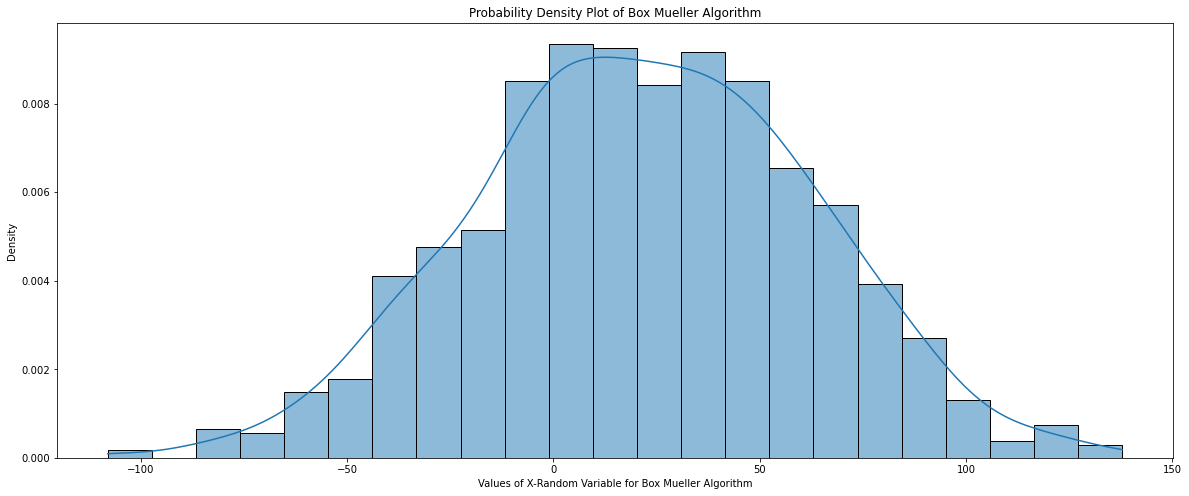

In [12]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=box_dataframe, x='Box_Mueller_X',ax=ax1,stat="density",kde=True)
ax1.set_xlabel("Values of X-Random Variable for Box Mueller Algorithm")
ax1.set_title('Probability Density Plot of Box Mueller Algorithm')
#sns.histplot(data=box_dataframe,x="Random_Normal",ax=ax2,stat="density")

Text(0.5, 1.0, 'Probability Density Plot of Box Mueller Algorithm')

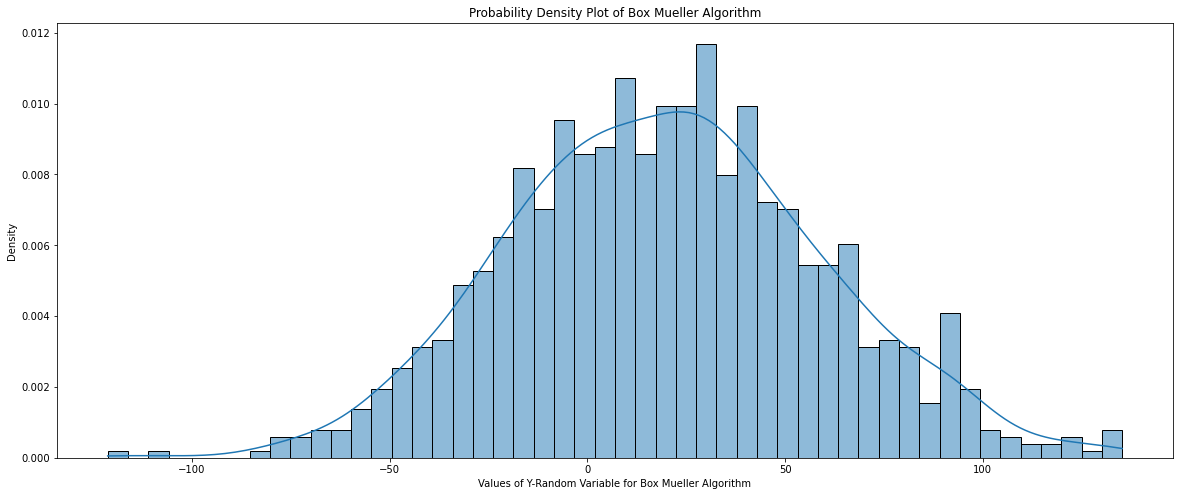

In [13]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=box_dataframe, x='Box_Mueller_Y',ax=ax1,stat="density",kde=True,bins=50)
ax1.set_xlabel("Values of Y-Random Variable for Box Mueller Algorithm")
ax1.set_title('Probability Density Plot of Box Mueller Algorithm')